# Unity ML-Agents Toolkit
## Environment Basics
This notebook contains a walkthrough of the basic functions of the Python API for the Unity ML-Agents toolkit. For instructions on building a Unity environment, see [here](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Getting-Started-with-Balance-Ball.md).

### 1. Set environment parameters

Be sure to set `env_name` to the name of the Unity environment file you want to launch. Ensure that the environment build is in the `python/` directory.

In [1]:
#pip install keras-rl

import sys
env_name = "python"  # Name of the Unity environment binary to launch
#env_name = None  # Name of the Unity environment binary to launch
train_mode = True  # Whether to run the environment in training or inference mode

print("Python version:")
print(sys.version)
print(sys.version_info[0])

Python version:
3.5.2 |Anaconda 4.1.1 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
3


### 2. Load dependencies

The following loads the necessary dependencies and checks the Python version (at runtime). ML-Agents Toolkit (v0.3 onwards) requires Python 3.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from unityagents import UnityEnvironment

%matplotlib inline

print("Python version:")
print(sys.version)

# check Python version
if (sys.version_info[0] < 3):
    raise Exception("ERROR: ML-Agents Toolkit (v0.3 onwards) requires Python 3")

Python version:
3.5.2 |Anaconda 4.1.1 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]


In [22]:
from keras.models import Sequential
from keras.layers import *
from keras.models import Model
from keras.optimizers import Adam
import keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

INPUT_SHAPE = (512, 512)
WINDOW_LENGTH = 4
ACTIONS_LENGTH = 8
cnn_kernel_count = 40

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()


input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

frame_in = Input(shape=input_shape)

if K.image_dim_ordering() == 'tf':
    # (width, height, channels)
    x = Permute((2, 3, 1))(frame_in)
elif K.image_dim_ordering() == 'th':
    # (channels, width, height)
    x = Permute((1, 2, 3))(frame_in)

x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = MaxPooling2D((2, 2))(x)



x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = Conv2D(cnn_kernel_count, (3, 3),
           padding = "same",
           activation = "relu",)(x)
x = MaxPooling2D((2, 2))(x)



x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(ACTIONS_LENGTH, activation='linear')(x)


model = Model([frame_in], [predictions])

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 4, 512, 512)       0         
_________________________________________________________________
permute_10 (Permute)         (None, 512, 512, 4)       0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 512, 512, 40)      1480      
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 512, 512, 40)      14440     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 256, 256, 40)      0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 256, 256, 40)      14440     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 256, 256, 40)      14440     
__________

In [23]:
# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!


class FoosProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')  # resize and convert to grayscale
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')  # saves storage in experience memory

    def process_state_batch(self, batch):
        # We could perform this processing step in `process_observation`. In this case, however,
        # we would need to store a `float32` array instead, which is 4x more memory intensive than
        # an `uint8` array. This matters if we store 1M observations.
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)



memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
processor = AtariProcessor()


NameError: name 'AtariProcessor' is not defined

### 3. Start the environment
`UnityEnvironment` launches and begins communication with the environment when instantiated.

Environments contain _brains_ which are responsible for deciding the actions of their associated _agents_. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
env = UnityEnvironment(file_name=env_name)


# Examine environment parameters
print(str(env))

# Set the default brain to work with
default_brain = env.brain_names[0]
brain = env.brains[default_brain]

Unity Academy name: Academy
        Number of Brains: 2
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BrainHeuristic
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 8
        Vector Action descriptions: Rod 1 linear, Rod 2 linear, Rod 3 linear, Rod 4 linear, Rod 1 torque, Rod 2 torque, Rod 3 torque, Rod 4 torque
Unity brain name: BrainTraining
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 8
        Vector Action descriptions: Rod 1 li

### 4. Examine the observation and state spaces
We can reset the environment to be provided with an initial set of observations and states for all the agents within the environment. In ML-Agents, _states_ refer to a vector of variables corresponding to relevant aspects of the environment for an agent. Likewise, _observations_ refer to a set of relevant pixel-wise visuals for an agent.

Agent state looks like: 
[]
Agent observations look like:


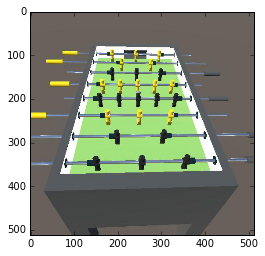

In [4]:
# Reset the environment
env_info = env.reset(train_mode=train_mode)[default_brain]

# Examine the state space for the default brain
print("Agent state looks like: \n{}".format(env_info.vector_observations[0]))

# Examine the observation space for the default brain
for observation in env_info.visual_observations:
    print("Agent observations look like:")
    if observation.shape[3] == 3:
        plt.imshow(observation[0,:,:,:])
    else:
        plt.imshow(observation[0,:,:,0])

### 5. Take random actions in the environment
Once we restart an environment, we can step the environment forward and provide actions to all of the agents within the environment. Here we simply choose random actions based on the `action_space_type` of the default brain. 

Once this cell is executed, 10 messages will be printed that detail how much reward will be accumulated for the next 10 episodes. The Unity environment will then pause, waiting for further signals telling it what to do next. Thus, not seeing any animation is expected when running this cell.

In [ ]:
for episode in range(10):
    env_info = env.reset(train_mode=train_mode)[default_brain]
    done = False
    episode_rewards = 0
    while not done:
        if brain.vector_action_space_type == 'continuous':
            env_info = env.step(np.random.randn(len(env_info.agents), 
                                                brain.vector_action_space_size))[default_brain]
        else:
            env_info = env.step(np.random.randint(0, brain.vector_action_space_size, 
                                                  size=(len(env_info.agents))))[default_brain]
        episode_rewards += env_info.rewards[0]
        done = env_info.local_done[0]
    print("Total reward this episode: {}".format(episode_rewards))

### 6. Close the environment when finished
When we are finished using an environment, we can close it with the function below.

In [ ]:
env.close()